In [1]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# importing dataset from kaggle
# Giving kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Extracting the zip file
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
# Extracting the zip file(Train.zip)
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
import os
# counting the number of files in the train folder
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print(file_count)

25000


In [6]:
# Printing the name of images
file_names = os.listdir('/content/train')
print(file_names)


['dog.6089.jpg', 'dog.8334.jpg', 'cat.4078.jpg', 'dog.837.jpg', 'dog.11043.jpg', 'dog.11149.jpg', 'cat.839.jpg', 'dog.9575.jpg', 'dog.11140.jpg', 'dog.11142.jpg', 'dog.3548.jpg', 'dog.8718.jpg', 'dog.2406.jpg', 'dog.4797.jpg', 'dog.1007.jpg', 'dog.9408.jpg', 'cat.107.jpg', 'dog.1652.jpg', 'cat.2268.jpg', 'dog.7724.jpg', 'dog.3967.jpg', 'cat.1935.jpg', 'cat.579.jpg', 'dog.9551.jpg', 'dog.1260.jpg', 'dog.10545.jpg', 'dog.6196.jpg', 'dog.8611.jpg', 'cat.1634.jpg', 'cat.10134.jpg', 'cat.2639.jpg', 'dog.3577.jpg', 'dog.11063.jpg', 'dog.10150.jpg', 'cat.7776.jpg', 'cat.11537.jpg', 'cat.2290.jpg', 'cat.4989.jpg', 'dog.5399.jpg', 'cat.925.jpg', 'cat.2997.jpg', 'dog.241.jpg', 'dog.11007.jpg', 'cat.495.jpg', 'dog.8549.jpg', 'dog.3154.jpg', 'dog.7997.jpg', 'cat.11787.jpg', 'cat.5964.jpg', 'cat.10103.jpg', 'cat.5381.jpg', 'dog.9157.jpg', 'cat.7696.jpg', 'dog.4662.jpg', 'cat.4968.jpg', 'dog.3794.jpg', 'dog.9627.jpg', 'cat.6936.jpg', 'dog.828.jpg', 'cat.6530.jpg', 'dog.8007.jpg', 'dog.8463.jpg', 'do

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dog and cat

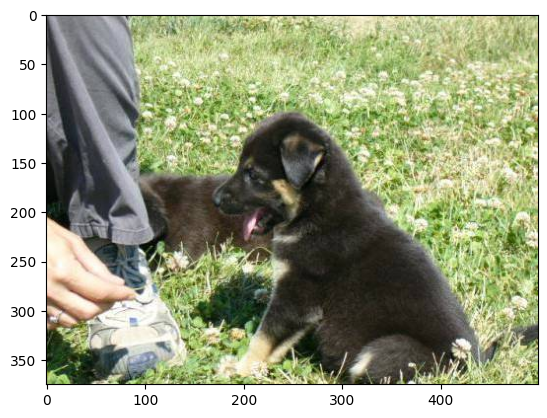

In [8]:
# display dog image
img = mpimg.imread('/content/train/dog.8334.jpg')

imgplt=plt.imshow(img)
plt.show()

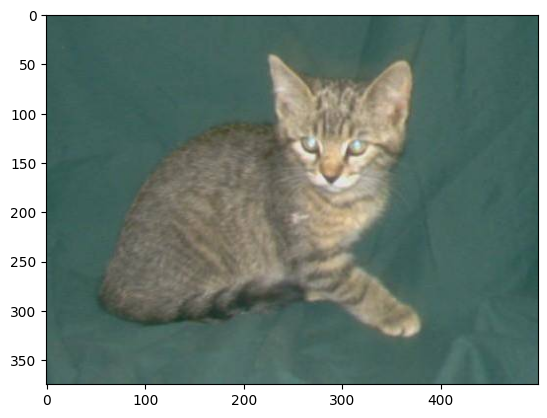

In [9]:
# display cat image
img = mpimg.imread('/content/train/cat.4078.jpg')

imgplt=plt.imshow(img)
plt.show()

Resizing all the images

In [10]:
# Creating a directory for resized images
os.makedirs("/content/image_resized", exist_ok=True)

In [11]:
original_folder = "/content/train/"

resized_folder = "/content/image_resized/"
# taking 2000 images  from original folder

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename
  # we are using mobile net v2 which is pretrained model and it needs image of size 224*224
  img = Image.open(img_path)
  img = img.resize((224,224))
  img =img.convert("RGB")

  new_img_path = resized_folder + filename
  img.save(new_img_path)

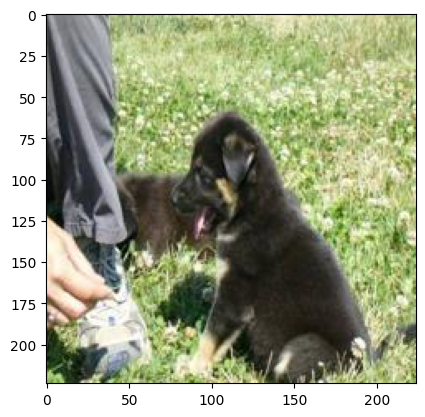

In [12]:
# display resized dog image
img = mpimg.imread('/content/image_resized/dog.8334.jpg')

imgplt=plt.imshow(img)
plt.show()

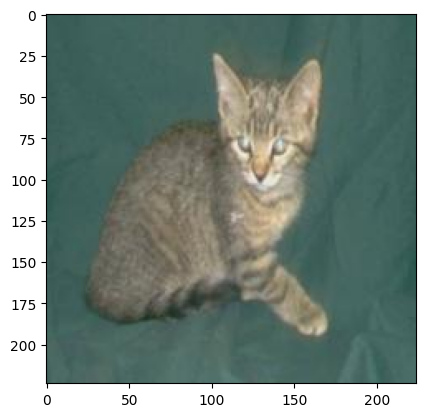

In [13]:
# display resized cat image
img = mpimg.imread('/content/image_resized/cat.4078.jpg')

imgplt=plt.imshow(img)
plt.show()

In [14]:
# Creating lables for resized images of dogs and cats
# cat - 0
# dog - 1
# Creating a loop to assign labels
filename = os.listdir("/content/image_resized/")

labels = []
for i in filename:
  if i.startswith("cat"):
    labels.append(0)
  else:
    labels.append(1)

In [15]:
print(labels)

[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 

In [16]:
# counting how many dog images and how many cat images in 2000 images
cat=[]
dog=[]
for i in filename:
  if i.startswith("cat"):
    cat.append(i)
  else:
    dog.append(i)
print(len(cat))
print(len(dog))

998
1002


Converting images to numpy array

In [17]:
import cv2
import glob

image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images =np.asarray([cv2.imread(file) for file in files])

array([[[123, 118, 117],
        [150, 145, 144],
        [170, 165, 164],
        ...,
        [120, 172, 155],
        [106, 155, 139],
        [151, 200, 184]],

       [[114, 109, 108],
        [144, 139, 138],
        [170, 165, 164],
        ...,
        [131, 183, 166],
        [121, 173, 156],
        [156, 208, 191]],

       [[101,  96,  95],
        [134, 129, 128],
        [168, 163, 162],
        ...,
        [125, 178, 164],
        [126, 180, 163],
        [147, 201, 184]],

       ...,

       [[132, 202, 171],
        [114, 187, 155],
        [108, 185, 151],
        ...,
        [107, 180, 158],
        [ 74, 148, 124],
        [ 93, 169, 145]],

       [[ 85, 153, 122],
        [106, 179, 147],
        [105, 182, 148],
        ...,
        [124, 198, 174],
        [ 96, 170, 146],
        [109, 183, 157]],

       [[111, 179, 148],
        [108, 178, 147],
        [ 85, 162, 128],
        ...,
        [128, 200, 177],
        [102, 176, 150],
        [ 82, 156, 130]]], dtype=uint8)
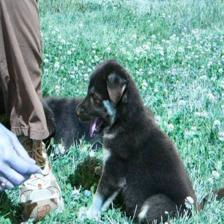

In [18]:
dog_cat_images[1]

In [19]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [20]:
x = dog_cat_images
y = np.asarray(labels)


Train Test split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
x_train.shape

(1600, 224, 224, 3)

In [23]:
# Scaling the data
x_train = x_train/255
x_test = x_test/255

Building the Neural Network

In [24]:
import tensorflow as tf
import tensorflow_hub as hub

In [25]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [26]:
num_of_classes  = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [27]:
# We used this to downgrade tf and keras version so that we can run above code without error
pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [29]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 76s 1s/step - loss: 0.1789 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 68s 1s/step - loss: 0.0633 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 74s 1s/step - loss: 0.0449 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 72s 1s/step - loss: 0.0363 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 72s 1s/step - loss: 0.0295 - acc: 0.9906


In [30]:
loss,acc = model.evaluate(x_test,y_test)

13/13 [==============================] - 27s 2s/step - loss: 0.0681 - acc: 0.9750


predictive system

In [32]:
input_image_path = input("Enter the path of the image: ")
# cv2.imread will read the image and convert to numpy array
input_image = cv2.imread(input_image_path)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
# as we are predicting only one image we need to reshape it
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)
pred_label = np.argmax(input_prediction)
if pred_label == 0:
  print("The image is cat")
else:
  print("The image is dog")

Enter the path of the image: /content/samplecat.jpeg
1/1 [==============================] - 1s 623ms/step
The image is cat
